## BAIT 509 - Final Group Assignment

### Group Members (Group 22)

### - Michelle LEE
### - Gagan Singh
### - Kaustubh Pandit
### - JEN- HSIANG YANG


### Dataset Overview:
***In the bustling metropolis of Mumbai, India, where the real estate market echoes the heartbeat of the city, our project dives into a dataset that encapsulates the essence of the property landscape. Comprising details on residential properties, including apartments and houses, this dataset unfolds the narrative of Mumbai's housing market. Key attributes such as the number of bedrooms, property type, locality, size, price, and more, serve as the threads weaving this intricate tapestry.***

### Motivation:
****The driving force behind our exploration lies in the inherent challenges faced by both buyers and sellers in Mumbai's bustling real estate scene. With properties ranging from apartments to villas, each equipped with distinctive attributes, understanding the factors influencing house prices becomes imperative. This predictive model aims to empower stakeholders with valuable insights, facilitating informed decisions in this high-stakes domain.****

### Business Question:
***In response to the intricacies of Mumbai's real estate landscape, our business question is poised to tackle the heart of the matter: Can we construct a robust supervised learning model capable of accurately predicting house prices? By delving into the features embedded in property listings, including the number of bedrooms, property type, locality, size, and other pertinent details, our aim is to equip our client with a predictive tool that transcends the uncertainties of the market.***

***This question crystallizes the overarching objective of our project: to harness the power of machine learning in deciphering the nuanced relationships between property features and prices, ultimately providing a valuable tool for navigating the intricate world of Mumbai's real estate.***

### Import Neccessary Packages

In [974]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier
import altair as alt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



## Data Preprocessing:

In [975]:
#Read the CSV file
data = pd.read_csv('properties.csv')

#Display the first few rows of the DataFrame
data.head()

,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,...,1,1,1,1,1,NaN,Y,NaN,NaN,NaN
3,12682,Under Construction,Dec '25,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,NaN,NaN,4950000.0,49.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


In [976]:
#check data types
pd.options.display.max_info_columns = 200 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Data columns (total 145 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    ID                                       12685 non-null  int64  
 1    Possession Status                        12607 non-null  object 
 2    Availability Starts From                 3083 non-null   object 
 3    Floor No                                 11827 non-null  object 
 4    Commercial                               12685 non-null  object 
 5    Developer                                7006 non-null   object 
 6    Approved Authority Name                  6143 non-null   object 
 7    Units Available                          6135 non-null   float64
 8    Price                                    12601 non-null  float64
 9    Price (English)                          12685 non-null  object 
 10   Flooring Type                   

### ***Checking the first 50 columns for Nulls since the rest of the columns are already One Hot Encoded and we will need to conduct transformations or drop only these columns***

In [977]:
#Checking the first 50 columns for null values
data.iloc[:, :50].isnull().sum()

ID                              0
Possession Status              78
Availability Starts From     9602
Floor No                      858
Commercial                      0
Developer                    5679
Approved Authority Name      6542
Units Available              6550
Price                          84
Price (English)                 0
Flooring Type                4534
Electricity Status           5425
Maintenance Type             5613
Maintenance Charges          6402
Booking Amount               4984
Landmark                     4644
Covered Area                 1311
Project Name                 4531
sqft Price                   1205
Carpet Area                  2552
Area Name                       0
Property Uniqueness          8025
Unit of Carpet Area          1307
Society                         0
Ownership Type               3260
furnished Type                 77
Bathroom                       69
Parking                      6159
Facing                       3569
Amenities Faci

In [978]:
data = data.drop(['ID','Price (English)', 'Landmark','Rera','Developer','Luxury Flat','isLuxuryServiceProvided',
                  'Approved Authority Name','Availability Starts From','Project Name','Flooring Type',
                  'Booking Amount','Area Name','Property Uniqueness','Parking','Amenities Facing','Floor Data',
                  'Data Referred From','Location','Property','Possession By', 'NRI Pref','Land Area / Covered Area',
                  'Land Area Unit', 'Pantry Type','Tenants Preference','sqft Price ','Covered Area.1'], axis=1)

In [979]:
data.iloc[:, :27].isnull().sum()

Possession Status            78
Floor No                    858
Commercial                    0
Units Available            6550
Price                        84
Electricity Status         5425
Maintenance Type           5613
Maintenance Charges        6402
Covered Area               1311
Carpet Area                2552
Unit of Carpet Area        1307
Society                       0
Ownership Type             3260
furnished Type               77
Bathroom                     69
Facing                     3569
Transaction Type              0
Type of Property              0
City                          0
bedroom                       0
floors                      866
Water Status               5396
Carpet Area Unit           2607
isPrimeLocationProperty       0
covArea Unit               1307
Property Lifespan          4812
balconies                  6923
dtype: int64

### ***Now we will be looking at each of the 30 columns above to see if there is a need for manual transformation of each of the column's non-null values***

In [980]:
data['Possession Status'].value_counts()

Possession Status
Ready to Move         9735
Under Construction    2630
Dec '26                 50
Dec '24                 31
Dec '23                 29
Dec '25                 28
Jun '24                 21
Dec '27                 16
Jun '26                 16
Dec '28                 12
Mar '25                  6
Mar '24                  5
Apr '28                  4
Sep '26                  4
Immediately              4
Nov '25                  3
Apr '24                  3
Jun '25                  3
Sep '23                  3
Nov '23                  2
Select Date              2
Name: count, dtype: int64

In [981]:
# Function to transform the 'Possession Status' values so that there are only two types of non-null values 
# categorising them into Under Consruction and Ready to Move 
def transform_possession_status(value):
    if pd.isnull(value):
        return 'Ready to Move' # Keep null values unchanged
    elif value in ['Immediately', 'Ready to Move','NA','Select Date']:
        return 'Ready to Move'
    #This is done because from the data we can see that for the respective NA rows
    # the transaction types are resale/rent indicating they are ready to move in
    else:
        return 'Under Construction'

# Apply the transformation
data['Possession Status'] = data['Possession Status'].apply(transform_possession_status)

In [982]:
data['Possession Status'].value_counts()

Possession Status
Ready to Move         9819
Under Construction    2866
Name: count, dtype: int64

In [983]:
data['Floor No'].value_counts()

Floor No
3     1004
4      970
2      958
1      920
5      868
      ... 
93       1
65       1
44       1
56       1
66       1
Name: count, Length: 70, dtype: int64

In [984]:
# Function to transform the 'Floor Number' values to keep only numerical data, 
# hence converting the basement data points to numbers
def transform_floor_number(value):
    if pd.isnull(value):
        return value  # Keep null values unchanged
    elif value == 'Upper Basement':
        return -1
    elif value == 'Lower Basement':
        return -2
    elif value == 'Ground':
        return 0
    elif value == 'NA':
        return None
    else:
        return value  # Keep other numeric values unchanged

# Apply the transformation
data['Floor No'] = data['Floor No'].apply(transform_floor_number)

data['Floor No'] = pd.to_numeric(data['Floor No'], errors='coerce').astype('Int64')

# Check the new data type
print(data['Floor No'].dtype)

Int64


In [985]:
data['Electricity Status'].value_counts()

Electricity Status
No/Rare Powercut             7238
Less Than 2 Hour Powercut      18
2 To 4 Hours Powercut           3
Over 6 Hours Powercut           1
Name: count, dtype: int64

In [986]:
data.rename(columns={'Electricity Status': '24H Elec'}, inplace=True)

# Function to transform the '24H Elec' values to binary
def transform_electricity_status(value):
    if pd.isnull(value):
        return value  # Keep null values unchanged
    elif value == 'No/Rare Powercut':
        return 1
    else:
        return 0

# Apply the transformation
data['24H Elec'] = data['24H Elec'].apply(transform_electricity_status)

In [987]:
data['24H Elec'] = data['24H Elec'].replace(np.nan, 1)
data['24H Elec'].value_counts()

24H Elec
1.0    12663
0.0       22
Name: count, dtype: int64

In [988]:
data['City'].value_counts()

City
Mumbai       8542
Thane        4113
Kalyan          9
Hyderabad       8
Nagpur          7
Palghar         2
Bhiwandi        2
Agartala        1
Gurgaon         1
Name: count, dtype: int64

In [989]:
# List of cities to be removed
# Dropping these cities since they are not around Mumbai and can skew the pricing data since property prices vary
cities_to_remove = ['Hyderabad', 'Nagpur', 'Agartala', 'Gurgaon']

# Drop rows where 'City' is in the list of cities to remove
data = data[~data['City'].isin(cities_to_remove)]

# Drop the 'City' column since now all the data points are in and around Mumbai
data.drop('City', axis=1, inplace=True)

In [990]:
data['floors'].value_counts()

floors
7.0      1652
4.0       842
22.0      642
8.0       479
23.0      409
         ... 
77.0        1
200.0       1
71.0        1
93.0        1
74.0        1
Name: count, Length: 83, dtype: int64

In [991]:
data['floors'] = data['floors'].replace('NA', np.nan)

# Display the Valuecounts to verify changes
data['floors'].value_counts()

floors
7.0      1652
4.0       842
22.0      642
8.0       479
23.0      409
         ... 
77.0        1
200.0       1
71.0        1
93.0        1
74.0        1
Name: count, Length: 83, dtype: int64

In [992]:
data['Water Status'].value_counts()

Water Status
Water Availability 24 Hours Available    7023
Water Availability 1 Hour Available       115
Water Availability 2 Hours Available       83
Water Availability 12 Hours Available      39
Water Availability 6 Hours Available       23
Name: count, dtype: int64

In [993]:
# Rename the 'Water Status' column to '24H Water'
data.rename(columns={'Water Status': '24H Water'}, inplace=True)

# Function to transform the '24H Water' values
def transform_water_status(value):
    if pd.isnull(value):
        return np.nan  # Keep null values unchanged
    elif value == 'Water Availability 24 Hours Available':
        return 1
    else:
        return 0

# Apply the transformation
data['24H Water'] = data['24H Water'].apply(transform_water_status)

In [994]:
data['24H Water'].value_counts()

24H Water
1.0    7023
0.0     260
Name: count, dtype: int64

In [995]:
data['balconies'].value_counts()

balconies
1.0    2687
2.0    1456
3.0    1138
4.0     351
5.0      84
6.0      26
7.0       6
8.0       4
Name: count, dtype: int64

In [996]:
# Replace 'NA' with NaN in the 'Balconies' column
data['balconies'] = data['balconies'].replace('NA', np.nan)

# Display the DataFrame to verify changes
data.to_csv('output.csv', index=False)


In [997]:
data['Property Lifespan'].value_counts()

Property Lifespan
New Construction     1896
5 to 10 years        1609
Less than 5 years    1558
10 to 15 years       1119
Above 20 years        991
15 to 20 years        691
Name: count, dtype: int64

In [998]:
data['Unit of Carpet Area'].value_counts()

Unit of Carpet Area
Sq-ft      11345
Sq-m          11
Acre           2
Bigha          1
Hectare        1
Sq-yrd         1
Name: count, dtype: int64

In [999]:
data['Carpet Area Unit'].value_counts()

Carpet Area Unit
Sq-ft     10050
Sq-m         15
Acre          3
Marla         1
Ground        1
Name: count, dtype: int64

In [1000]:
data['covArea Unit'].value_counts()

covArea Unit
Sq-ft      11345
Sq-m          11
Acre           2
Bigha          1
Hectare        1
Sq-yrd         1
Name: count, dtype: int64

In [1001]:
# Keep only the rows where 'Carpet Area Unit' is 'Sq-ft'
# Drop rows where 'Carpet Area Unit' is not 'Sq-ft' but keep null values
data = data[(data['Carpet Area Unit'] == 'Sq-ft') | (data['Carpet Area Unit'].isnull())]

In [1002]:
data['Carpet Area Unit'].value_counts()

Carpet Area Unit
Sq-ft    10050
Name: count, dtype: int64

In [1003]:
data['Unit of Carpet Area'].value_counts()

Unit of Carpet Area
Sq-ft      11340
Sq-m           6
Acre           2
Bigha          1
Hectare        1
Sq-yrd         1
Name: count, dtype: int64

In [1004]:
# Drop rows where 'Carpet Area Unit' is not 'Sq-ft' but keep null values
data = data[(data['Unit of Carpet Area'] == 'Sq-ft') | (data['Unit of Carpet Area'].isnull())]

In [1005]:
data['Carpet Area Unit'].value_counts()

Carpet Area Unit
Sq-ft    10043
Name: count, dtype: int64

In [1006]:
data['Unit of Carpet Area'].value_counts()

Unit of Carpet Area
Sq-ft    11340
Name: count, dtype: int64

In [1007]:
data['covArea Unit'].value_counts()

covArea Unit
Sq-ft    11340
Name: count, dtype: int64

In [1008]:
data['Maintenance Type'].value_counts()

Maintenance Type
Monthly                 6071
Per sq. Unit Monthly     882
Quarterly                 64
Yearly                    37
One-Time                   4
Name: count, dtype: int64

In [1009]:
# Filter the DataFrame
data = data[(data['Maintenance Type'].isnull()) | (data['Maintenance Type'] == 'Monthly')]
#data.to_csv('output.csv', index=False)


In [1010]:
data['Maintenance Type'].value_counts()

Maintenance Type
Monthly    6071
Name: count, dtype: int64

In [1011]:
data= data.drop(['Carpet Area Unit', 'Unit of Carpet Area','covArea Unit','Maintenance Type'],axis=1)

In [1012]:
# Replace 'NaN' with 1 in the 'Units Available' column
data['Units Available'] = data['Units Available'].replace(np.nan, 1)

In [1013]:
data['24H Water'] = data['24H Water'].replace(np.nan, 1)

In [1014]:
data = data.dropna(subset=['Price'])

In [1015]:
data = data.dropna(subset=['Covered Area'])

In [1016]:
data = data.dropna(subset=['Carpet Area'])

In [1017]:
data.iloc[:, :22].isnull().sum()

Possession Status             0
Floor No                    405
Commercial                    0
Units Available               0
Price                         0
24H Elec                      0
Maintenance Charges        2922
Covered Area                  0
Carpet Area                   0
Society                       0
Ownership Type              941
furnished Type               11
Bathroom                      6
Facing                     1078
Transaction Type              0
Type of Property              0
bedroom                       0
floors                      406
24H Water                     0
isPrimeLocationProperty       0
Property Lifespan          2075
balconies                  3684
dtype: int64

In [1018]:
data.shape

(7890, 112)

In [1019]:
data['Ownership Type'].value_counts()

Ownership Type
Freehold                4939
Co-operative Society    1837
Leasehold                133
Power Of Attorney         40
Name: count, dtype: int64

In [1020]:
data['24H Water'].value_counts()

24H Water
1.0    7703
0.0     187
Name: count, dtype: int64

In [1021]:
data['Park'].value_counts()

Park
1    6164
0    1726
Name: count, dtype: int64

In [1022]:
# Get the first 22 column names as a list
first_22_column_names = data.columns[22:].tolist()
# Print the list of column names
print(first_22_column_names)



['Power Back Up', 'Lift', 'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking.1', 'Security', 'Water Storage', 'Private Terrace/Garden', 'Vaastu Compliant', 'Service/Goods Lift', 'Air Conditioned', 'Visitor Parking', 'Intercom Facility', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service', 'Internet/Wi-Fi Connectivity', 'DTH Television Facility', 'RO Water System', 'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court', 'Conference Room', 'Piped Gas', 'Jogging and Strolling Track', 'Outdoor Tennis Courts', 'Mansion', 'Downtown', 'Skyline View', 'Wrap Around Balcony', 'Island Kitchen Layout', 'Full Glass Wall', 'House help accommodation', 'Concierge Services', 'Garden View', 'Marble flooring', 'Well Furnished', 'Modular Kitchen', 'Helipad', 'Private pool ', 'Private Jaccuzi', 'Mini Cinema Theatre', 'Golf Course', 'Infinity Swimming Pool', 'Pool with temperature control ', 'Sea facing', 'Skydeck', 'Earth quake resistant', 'Theme based Architectures', 

In [1023]:
# Function to check if a column is binary - as bin variables are identified as int  
def is_binary(column):
    unique_values = column.unique()
    return len(unique_values) == 2 and all(value in [0, 1, '0', '1'] for value in unique_values)


bin = []
# Check if columns are binary
for column in data.columns:
    if is_binary(data[column]):
        bin.append(column)
    else:
        #print(f"{column} is not a binary field.")
        pass
bin


# Check and return columns with the value 'Y' - as some coulumns are binary variables using N and Y
columns_with_Y = data.columns[data.isin(['Y']).any()].tolist()
columns_with_Y

['Commercial', 'Society', 'isPrimeLocationProperty']

In [1024]:
numeric_features = ['Units Available','Floor No','Maintenance Charges','Bathroom','floors','balconies',
                    'Covered Area','Carpet Area','bedroom']


categorical_features = ['Possession Status','Ownership Type','furnished Type','Facing','Property Lifespan',
                        'Transaction Type','Type of Property','Commercial', 'Society', 'isPrimeLocationProperty','Commercial','Society','24H Water','isPrimeLocationProperty','Commercial','24H Elec','Power Back Up', 'Lift',
                            'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking.1', 'Security', 'Water Storage',
                            'Private Terrace/Garden', 'Vaastu Compliant', 'Service/Goods Lift', 'Air Conditioned', 'Visitor Parking',
                            'Intercom Facility', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service', 'Internet/Wi-Fi Connectivity',
                            'DTH Television Facility', 'RO Water System', 'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court', 'Conference Room',
                            'Piped Gas', 'Jogging and Strolling Track', 'Outdoor Tennis Courts', 'Mansion', 'Downtown', 'Skyline View', 
                            'Wrap Around Balcony', 'Island Kitchen Layout', 'Full Glass Wall', 'House help accommodation', 'Concierge Services',
                            'Garden View', 'Marble flooring', 'Well Furnished', 'Modular Kitchen', 'Helipad', 'Private pool ', 'Private Jaccuzi',
                            'Mini Cinema Theatre', 'Golf Course', 'Infinity Swimming Pool', 'Pool with temperature control ', 'Sea facing',
                            'Skydeck', 'Earth quake resistant', 'Theme based Architectures', 'Health club with Steam / Jaccuzi', 'Large Clubhouse ',
                            'Large Open space', 'Fingerprint Access', 'Grand Entrance lobby', 'Private Garage', 'Fireplace', 'Wine Cellar',
                            'Sky Villa', 'Water Front', 'Hilltop', 'Smart Home', 'Barbeque space', 'Kids play area', 'Library', 'Puja Room',
                            'Study', 'Servant Room', 'Store', 'Aerobics Room', 'Canopy Walk', 'Coffee Lounge & Restaurants', 'Dance Studio',
                            'Event Space & Amphitheatre', 'Flower Gardens', 'Guest Accommodation', 'Indoor Squash & Badminton Courts',
                            'Kids Play Area', 'Kids Play Pool With Water Slides', 'Library And Business Centre', 'Meditation Area',
                            'Multipurpose Courts', 'Recreational Pool', 'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)',
                            'Cycling & Jogging Track', 'Fire Fighting Equipment', 'Aesthetically designed landscape garden']



In [1025]:
len(list(set(categorical_features)))

102

### ***Remove outliers***

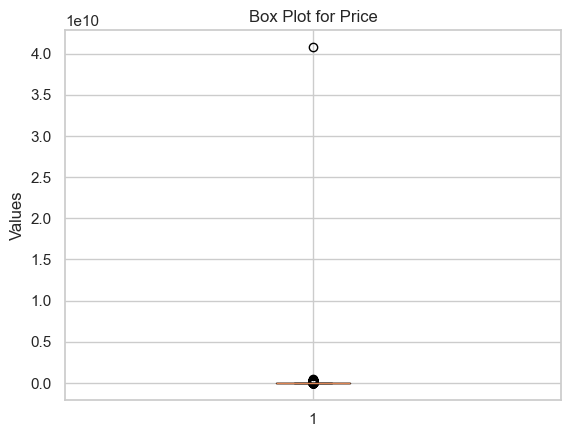

In [1026]:
# Specify the column for which you want to create a box plot
column_to_plot = 'Price'

# Plotting box plot for the specified column
plt.boxplot(data[column_to_plot])

# Setting plot title and labels
plt.title(f'Box Plot for {column_to_plot}')
plt.ylabel('Values')

# Show the plot
plt.show()

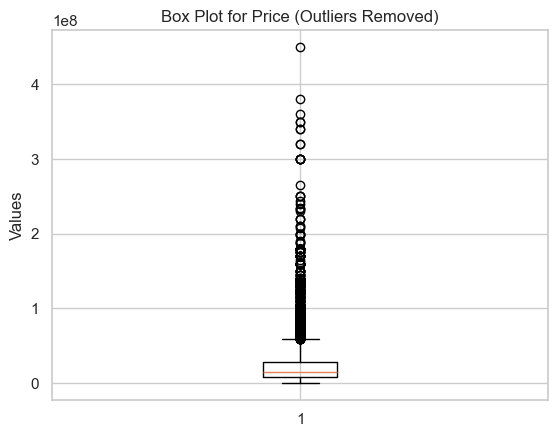

In [1027]:
# Remove outliers from the specified column
data = data[data['Price'] <=1000000000]


# Plotting box plot for the specified column without outliers
plt.boxplot(data['Price'])

# Setting plot title and labels
plt.title(f'Box Plot for Price (Outliers Removed)')
plt.ylabel('Values')

# Show the plot
plt.show()

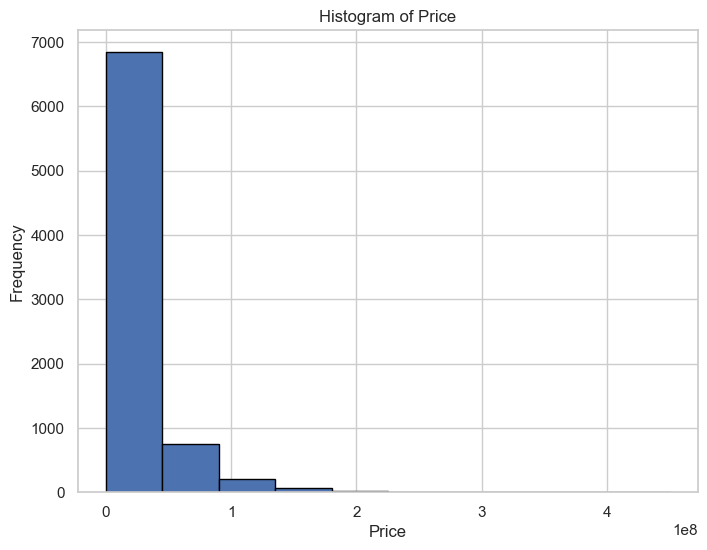

In [1028]:
# Create a histogram with 10 bins for the "Price" variable
plt.figure(figsize=(8, 6))
plt.hist(data['Price'], bins=10, edgecolor='black')
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

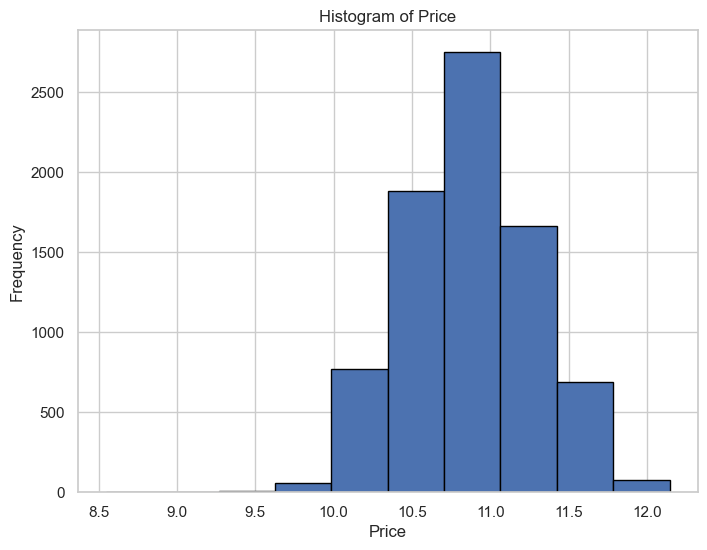

In [1029]:
from scipy import stats
# Create a histogram with 10 bins for the "Price" variable
transformed_data, lambda_value = stats.boxcox(data['Price'])


plt.figure(figsize=(8, 6))
plt.hist(transformed_data, bins=10, edgecolor='black')
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [1030]:
data['Price'] = transformed_data

***After box-cox tranformation, target Price is now normally distributed*** 



In [1031]:
#revmoe outlier of Maintenance Charges
column_to_plot = 'Maintenance Charges'
print(len(data[data[column_to_plot] >= 175000]))
len(data)

4


7889

In [1032]:
# Remove outliers from the specified column
data = data[(data[column_to_plot]  <= 175000) | (data[column_to_plot].isnull())]
print(len(data))


7885


## EDA 

### Numerical fields

In [1033]:
import seaborn as sns
import matplotlib.pyplot as plt

Units Available


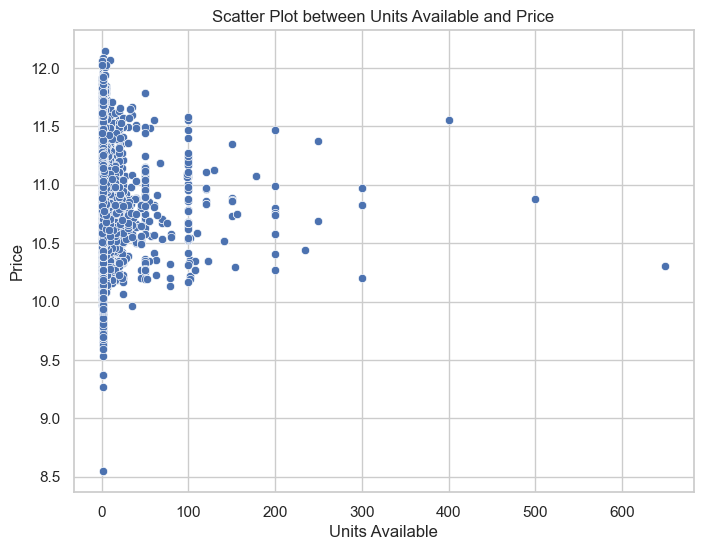

Floor No


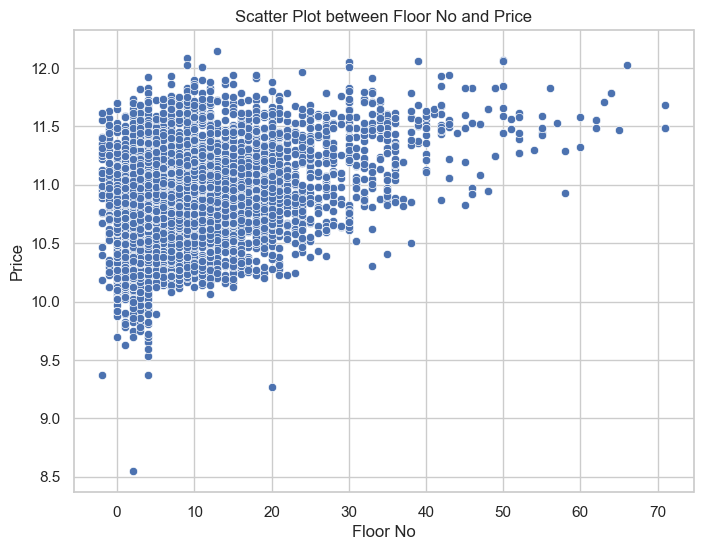

Maintenance Charges


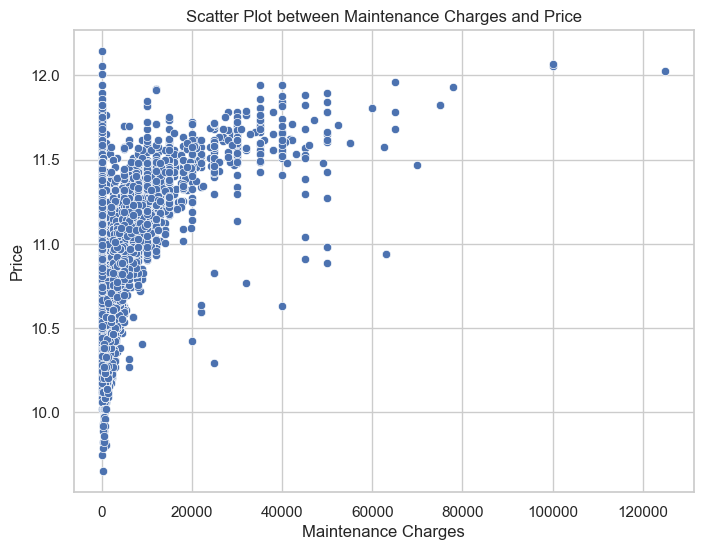

Bathroom


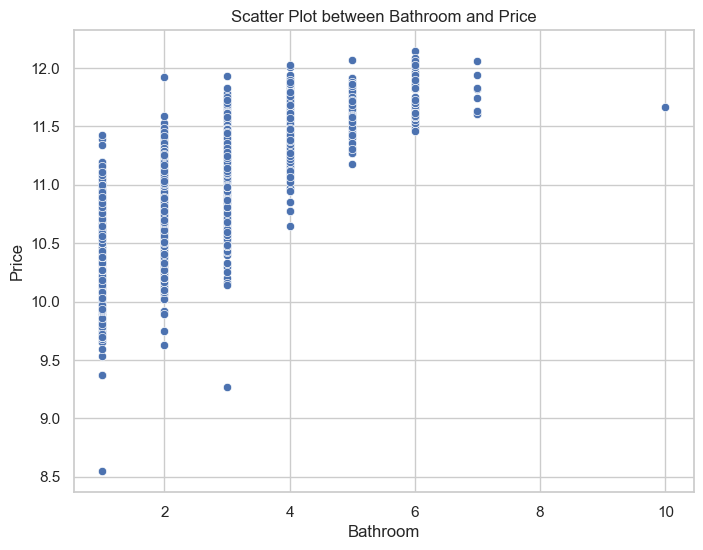

floors


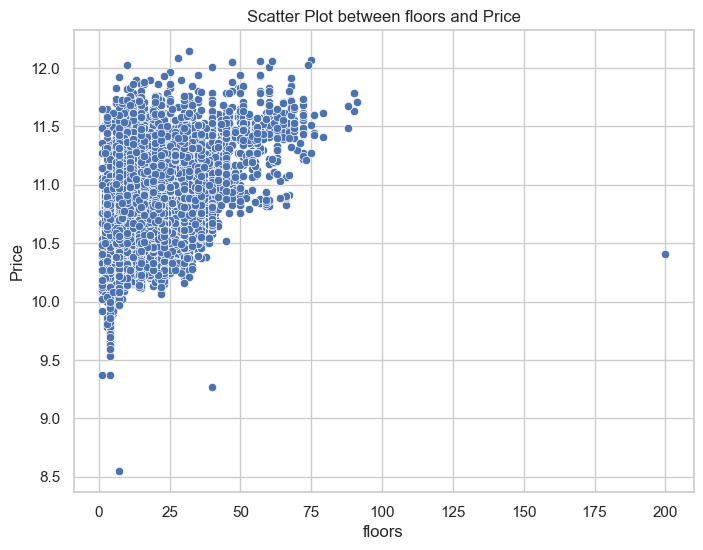

balconies


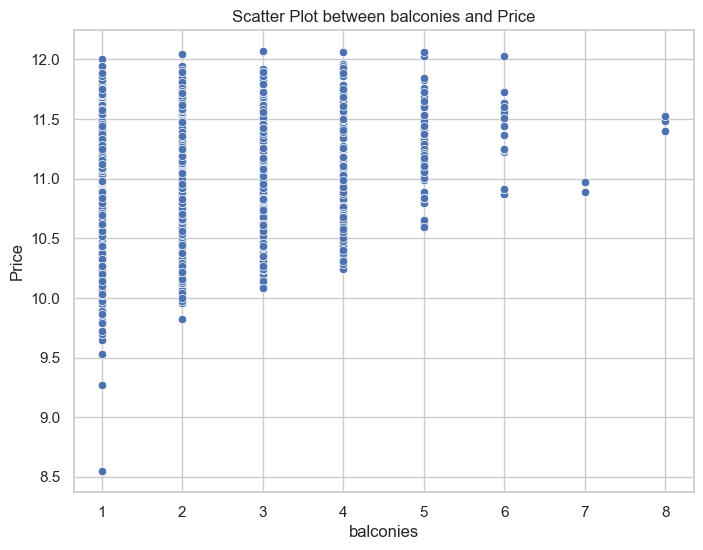

Covered Area


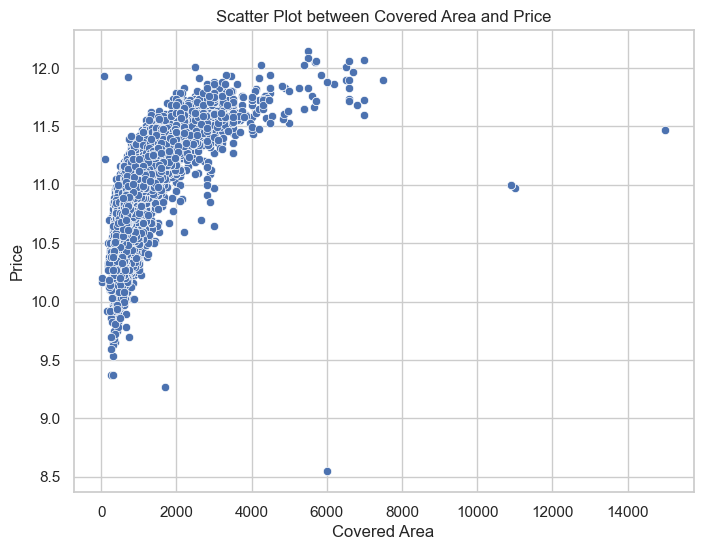

Carpet Area


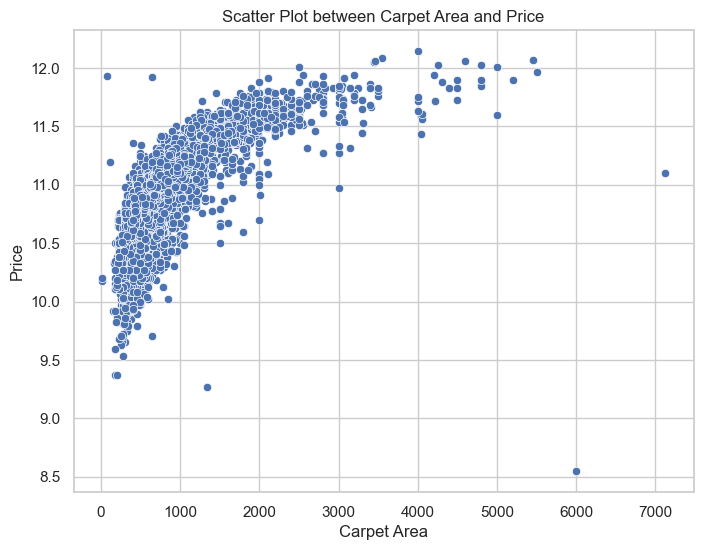

bedroom


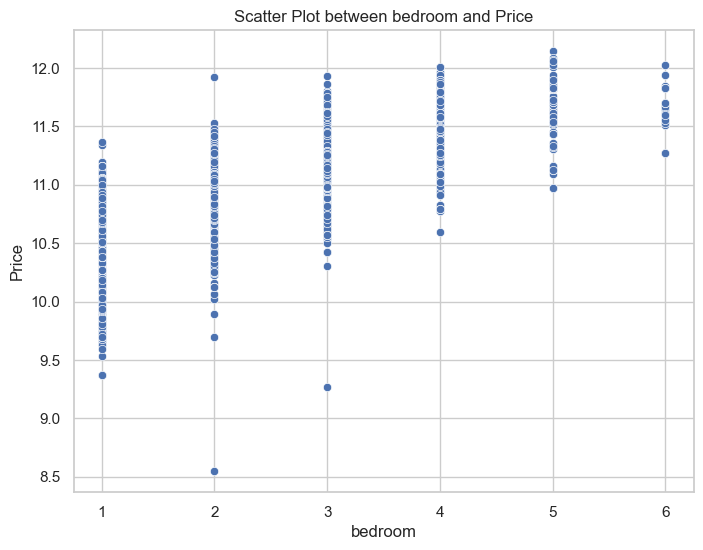

In [1034]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with your data
# Replace 'numeric_variable' with the actual names of your numeric colum
# Set the style of the plots (optional)
sns.set(style="whitegrid")

# Create a scatter plot for each numeric variable against the target 'price'
for col in numeric_features:
    print(col)
    plt.figure(figsize=(8, 6))  # Optional: Set the figure size
    sns.scatterplot(x=col, y='Price', data=data)
    plt.title(f'Scatter Plot between {col} and Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

#### First, we examine the relationship between the ***numerical fields*** and the target variable (Price). The variables [Maintenance Charges, Bathroom, Floor, Covered Area, Carpet Area, Bedroom] appear to have a strong relationship with the price

### Categorial fields

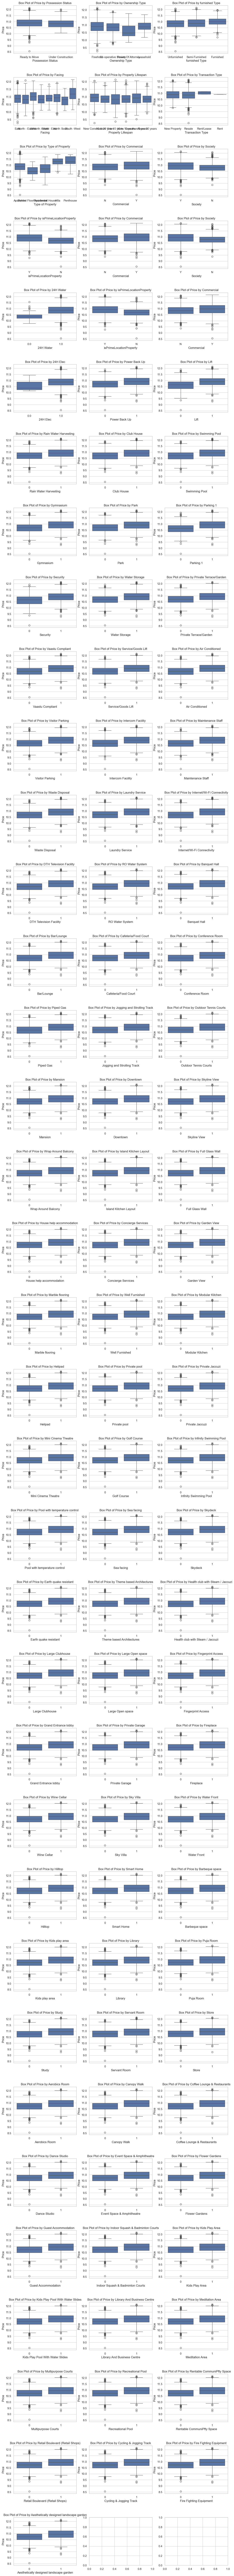

In [1035]:
# Calculate the number of rows and columns for the grid
num_rows = len(categorical_features) // 3 + (len(categorical_features) % 3 > 0)
num_cols = min(len(categorical_features), 3)

# Create subplots in a 3-column grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.5)

# Create box plots for each categorical variable
for i, col in enumerate(categorical_features):
    ax = axes[i // num_cols, i % num_cols]  # Get the current subplot
    sns.boxplot(x=col, y='Price', data=data, ax=ax)
    ax.set_title(f'Box Plot of Price by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')

#### Among ***categorical fields***, we observed that the variables [Ownership Type, Type of Property, 24H Water, Lifespan, Security, Piped Gas] appear to have a strong relationship with the price.


## Build Pipelines

### Transformer

In [1036]:
numeric_transformer = Pipeline([
        ("scaler", StandardScaler()),
        ("imputer", SimpleImputer(strategy="median"))
        ])
numeric_transformer

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median'))])

In [1037]:
categorical_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("OneHot",OneHotEncoder(handle_unknown="ignore", dtype="int", drop="if_binary"))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('OneHot',
                 OneHotEncoder(drop='if_binary', dtype='int',
                               handle_unknown='ignore'))])

In [1038]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Units Available', 'Floor No',
                                  'Maintenance Charges', 'Bathroom', 'floors',
                                  'balconies', 'Covered Area', 'Carpet Area',
                                  'bedroom']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_f...
                                  'Type of Property', 'Commercial', 'Society',
                                  'isPrimeLocationProperty', 'Commercial',
                                  'Society', '24H Water',
                                  'isPrimeLocationProperty', 'Commercial',
                                  '24H Elec', 'Power Back Up', 'Lift',
                                  'Rain Water Harvesting', 'Club House',
                                  'Swimming Pool', 'Gymnasium', 'Park',
                                  'Parking.1', 'Security', 'Water Storage',
                                  'Private Terrace/Garden', 'Vaastu Compliant',
                                  'Service/Goods Lift', 'Air Conditioned', ...])])

In [1039]:
preprocessor.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Units Available', 'Floor No',
                                  'Maintenance Charges', 'Bathroom', 'floors',
                                  'balconies', 'Covered Area', 'Carpet Area',
                                  'bedroom']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_f...
                                  'Type of Property', 'Commercial', 'Society',
                                  'isPrimeLocationProperty', 'Commercial',
                                  'Society', '24H Water',
                                  'isPrimeLocationProperty', 'Commercial',
                                  '24H Elec', 'Power Back Up', 'Lift',
                                  'Rain Water Harvesting', 'Club House',
                                  'Swimming Pool', 'Gymnasium', 'Park',
                                  'Parking.1', 'Security', 'Water Storage',
                                  'Private Terrace/Garden', 'Vaastu Compliant',
                                  'Service/Goods Lift', 'Air Conditioned', ...])])

### Split the dataset into 80% train and 20% test 

In [1040]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=893)

In [1041]:
X_train = train_df.drop(columns = ['Price'])
y_train = train_df['Price'] #np.sqrt(data_rm_outlier['Price']+1)
X_test = test_df.drop(columns =  ['Price'])
y_test = test_df['Price']

In [1059]:
from sklearn.feature_selection import RFE,RFECV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

### Main Pipeline

In [1043]:
main_pipe = make_pipeline(
    preprocessor,
    RFE(Ridge(), n_features_to_select=30, step=10, verbose=1)
)

scores = cross_validate(main_pipe, X_train, y_train, return_train_score=True)

pd.DataFrame(scores)

Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.
Fitting estimator with 99 features.
Fitting estimator with 89 features.
Fitting estimator with 79 features.
Fitting estimator with 69 features.
Fitting estimator with 59 features.
Fitting estimator with 49 features.
Fitting estimator with 39 features.
Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.
Fitting estimator with 99 features.
Fitting estimator with 89 features.
Fitting estimator with 79 features.
Fitting estimator with 69 features.
Fitting estimator with 59 features.
Fitting estimator with 49 features.
Fitting estimator with 39 features.
Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.
Fitting estimator with 99 features.
Fitting estimato

,fit_time,score_time,test_score,train_score
0,3.058831,0.090702,0.701896,0.678112
1,3.344618,0.036343,0.633732,0.644940
2,3.528724,0.026765,0.670280,0.674725
3,3.390982,0.037373,0.625587,0.670010
4,3.238329,0.052561,0.656085,0.675836


In [1044]:
main_pipe.fit(X_train, y_train)
main_pipe.score(X_test, y_test)

Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.
Fitting estimator with 99 features.
Fitting estimator with 89 features.
Fitting estimator with 79 features.
Fitting estimator with 69 features.
Fitting estimator with 59 features.
Fitting estimator with 49 features.
Fitting estimator with 39 features.


0.6547347070981568

In [1045]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6308 entries, 1810 to 6135
Data columns (total 111 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    Possession Status                        6308 non-null   object 
 1    Floor No                                 5989 non-null   Int64  
 2    Commercial                               6308 non-null   object 
 3    Units Available                          6308 non-null   float64
 4    24H Elec                                 6308 non-null   float64
 5    Maintenance Charges                      3986 non-null   float64
 6    Covered Area                             6308 non-null   float64
 7    Carpet Area                              6308 non-null   float64
 8    Society                                  6308 non-null   object 
 9    Ownership Type                           5555 non-null   object 
 10   furnished Type                      

In [1046]:
from xgboost import XGBRegressor

In [1047]:
xgb_regressor = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    gamma=0.2,  # Regularization parameter (controls overfitting)
    min_child_weight=5,  # Regularization parameter
    random_state=42,
    reg_lambda = 1,
    reg_alpha = 1
)


In [1048]:
main_pipe = make_pipeline(
    preprocessor,
    RFE(xgb_regressor, n_features_to_select=15, step=5, verbose=1)
)

scores = cross_validate(main_pipe, X_train, y_train, return_train_score=True)

pd.DataFrame(scores)

Fitting estimator with 139 features.
Fitting estimator with 134 features.
Fitting estimator with 129 features.
Fitting estimator with 124 features.
Fitting estimator with 119 features.
Fitting estimator with 114 features.
Fitting estimator with 109 features.
Fitting estimator with 104 features.
Fitting estimator with 99 features.
Fitting estimator with 94 features.
Fitting estimator with 89 features.
Fitting estimator with 84 features.
Fitting estimator with 79 features.
Fitting estimator with 74 features.
Fitting estimator with 69 features.
Fitting estimator with 64 features.
Fitting estimator with 59 features.
Fitting estimator with 54 features.
Fitting estimator with 49 features.
Fitting estimator with 44 features.
Fitting estimator with 39 features.
Fitting estimator with 34 features.
Fitting estimator with 29 features.
Fitting estimator with 24 features.
Fitting estimator with 19 features.
Fitting estimator with 139 features.
Fitting estimator with 134 features.
Fitting estimator 

,fit_time,score_time,test_score,train_score
0,1.392516,0.027236,0.808468,0.803874
1,1.334062,0.026143,0.791650,0.802958
2,1.248103,0.026217,0.801363,0.801787
3,1.243942,0.027479,0.769699,0.811742
4,1.466619,0.029177,0.779601,0.810560


In [1049]:
main_pipe.fit(X_train, y_train)
main_pipe.score(X_test, y_test)



Fitting estimator with 139 features.
Fitting estimator with 134 features.
Fitting estimator with 129 features.
Fitting estimator with 124 features.
Fitting estimator with 119 features.
Fitting estimator with 114 features.
Fitting estimator with 109 features.
Fitting estimator with 104 features.
Fitting estimator with 99 features.
Fitting estimator with 94 features.
Fitting estimator with 89 features.
Fitting estimator with 84 features.
Fitting estimator with 79 features.
Fitting estimator with 74 features.
Fitting estimator with 69 features.
Fitting estimator with 64 features.
Fitting estimator with 59 features.
Fitting estimator with 54 features.
Fitting estimator with 49 features.
Fitting estimator with 44 features.
Fitting estimator with 39 features.
Fitting estimator with 34 features.
Fitting estimator with 29 features.
Fitting estimator with 24 features.
Fitting estimator with 19 features.


0.7816842333482622

In [1050]:
# Get the column names of the transformed data
column_names_transformed = main_pipe.named_steps['columntransformer'].get_feature_names_out()

column_names_transformed

array(['numeric__Units Available', 'numeric__Floor No',
       'numeric__Maintenance Charges', 'numeric__Bathroom',
       'numeric__floors', 'numeric__balconies', 'numeric__Covered Area',
       'numeric__Carpet Area', 'numeric__bedroom',
       'categorical__Possession Status_Under Construction',
       'categorical__Ownership Type_Co-operative Society',
       'categorical__Ownership Type_Freehold',
       'categorical__Ownership Type_Leasehold',
       'categorical__Ownership Type_Power Of Attorney',
       'categorical__furnished Type_Furnished',
       'categorical__furnished Type_Semi-Furnished',
       'categorical__furnished Type_Unfurnished',
       'categorical__Facing_East', 'categorical__Facing_North',
       'categorical__Facing_North - East',
       'categorical__Facing_North - West', 'categorical__Facing_South',
       'categorical__Facing_South - East',
       'categorical__Facing_South -West', 'categorical__Facing_West',
       'categorical__Property Lifespan_10 to 15

### Feature importance (RFE)

In [1051]:
xgb_model = main_pipe.named_steps['rfe']

# Get feature importances from the XGBoost model
feature_importances = xgb_model.support_
feature_importances
column_names_transformed[feature_importances]

array(['numeric__Maintenance Charges', 'numeric__Bathroom',
       'numeric__floors', 'numeric__balconies', 'numeric__Covered Area',
       'numeric__Carpet Area', 'numeric__bedroom',
       'categorical__furnished Type_Furnished',
       'categorical__Property Lifespan_5 to 10 years',
       'categorical__Property Lifespan_Above 20 years',
       'categorical__Commercial_Y', 'categorical__Society_Y',
       'categorical__isPrimeLocationProperty_Y',
       'categorical__24H Water_1.0', 'categorical__Piped Gas_1'],
      dtype=object)

In [1060]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create RandomForestRegressor model
rf_regressor = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,  # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    bootstrap=True,  # Whether bootstrap samples are used when building trees
    random_state=42  # Controls randomness of the estimator
)
rf_pipe = make_pipeline(
    preprocessor,
    RFECV(rf_regressor, cv =2, step=10, verbose=1)
)



# Fit and evaluate RandomForestRegressor model
rf_scores = cross_validate(rf_pipe, X_train, y_train, return_train_score=True ,cv =2)
pd.DataFrame(rf_scores)

Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.
Fitting estimator with 99 features.
Fitting estimator with 89 features.
Fitting estimator with 79 features.
Fitting estimator with 69 features.
Fitting estimator with 59 features.
Fitting estimator with 49 features.
Fitting estimator with 39 features.
Fitting estimator with 29 features.
Fitting estimator with 19 features.
Fitting estimator with 9 features.
Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.
Fitting estimator with 99 features.
Fitting estimator with 89 features.
Fitting estimator with 79 features.
Fitting estimator with 69 features.
Fitting estimator with 59 features.
Fitting estimator with 49 features.
Fitting estimator with 39 features.
Fitting estimator with 29 features.
Fitting estimator with 19 features.
Fitting estimator wit

,fit_time,score_time,test_score,train_score
0,37.198123,0.098232,0.831561,0.972669
1,42.167238,0.098430,0.804151,0.975027


In [1053]:
# Create GradientBoostingRegressor model
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_pipe = make_pipeline(
    preprocessor,
    RFE(gb_regressor, n_features_to_select=15, step=5, verbose=1)
)
# Fit and evaluate GradientBoostingRegressor model
gb_scores = cross_validate(gb_pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(gb_scores)

Fitting estimator with 139 features.
Fitting estimator with 134 features.
Fitting estimator with 129 features.
Fitting estimator with 124 features.
Fitting estimator with 119 features.
Fitting estimator with 114 features.
Fitting estimator with 109 features.
Fitting estimator with 104 features.
Fitting estimator with 99 features.
Fitting estimator with 94 features.
Fitting estimator with 89 features.
Fitting estimator with 84 features.
Fitting estimator with 79 features.
Fitting estimator with 74 features.
Fitting estimator with 69 features.
Fitting estimator with 64 features.
Fitting estimator with 59 features.
Fitting estimator with 54 features.
Fitting estimator with 49 features.
Fitting estimator with 44 features.
Fitting estimator with 39 features.
Fitting estimator with 34 features.
Fitting estimator with 29 features.
Fitting estimator with 24 features.
Fitting estimator with 19 features.
Fitting estimator with 139 features.
Fitting estimator with 134 features.
Fitting estimator 

,fit_time,score_time,test_score,train_score
0,19.126971,0.031917,0.815560,0.828610
1,19.077818,0.029759,0.807845,0.831492
2,19.218984,0.030121,0.816076,0.829749
3,19.229179,0.030379,0.771151,0.829705
4,19.110350,0.041284,0.789233,0.836328


In [1054]:
gb_pipe.fit(X_train, y_train)
gb_pipe.score(X_test, y_test)

Fitting estimator with 139 features.
Fitting estimator with 134 features.
Fitting estimator with 129 features.
Fitting estimator with 124 features.
Fitting estimator with 119 features.
Fitting estimator with 114 features.
Fitting estimator with 109 features.
Fitting estimator with 104 features.
Fitting estimator with 99 features.
Fitting estimator with 94 features.
Fitting estimator with 89 features.
Fitting estimator with 84 features.
Fitting estimator with 79 features.
Fitting estimator with 74 features.
Fitting estimator with 69 features.
Fitting estimator with 64 features.
Fitting estimator with 59 features.
Fitting estimator with 54 features.
Fitting estimator with 49 features.
Fitting estimator with 44 features.
Fitting estimator with 39 features.
Fitting estimator with 34 features.
Fitting estimator with 29 features.
Fitting estimator with 24 features.
Fitting estimator with 19 features.


0.7802244197280794

In [1061]:
rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_test, y_test)

Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.
Fitting estimator with 99 features.
Fitting estimator with 89 features.
Fitting estimator with 79 features.
Fitting estimator with 69 features.
Fitting estimator with 59 features.
Fitting estimator with 49 features.
Fitting estimator with 39 features.
Fitting estimator with 29 features.
Fitting estimator with 19 features.
Fitting estimator with 9 features.
Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.
Fitting estimator with 99 features.
Fitting estimator with 89 features.
Fitting estimator with 79 features.
Fitting estimator with 69 features.
Fitting estimator with 59 features.
Fitting estimator with 49 features.
Fitting estimator with 39 features.
Fitting estimator with 29 features.
Fitting estimator with 19 features.
Fitting estimator wit

0.8368904672820825

### randomforest regressor has the highest score

## Hyperparameter